# Activity: Evaluate simple linear regression

## Introduction

In this activity, you will use simple linear regression to explore the relationship between two continuous variables. To accomplish this, you will perform a complete simple linear regression analysis, which includes creating and fitting a model, checking model assumptions, analyzing model performance, interpreting model coefficients, and communicating results to stakeholders.

For this activity, you are part of an analytics team that provides insights about marketing and sales. You have been assigned to a project that focuses on the use of influencer marketing, and you would like to explore the relationship between marketing promotional budgets and sales. The dataset provided includes information about marketing campaigns across TV, radio, and social media, as well as how much revenue in sales was generated from these campaigns. Based on this information, leaders in your company will make decisions about where to focus future marketing efforts, so it is critical to have a clear understanding of the relationship between the different types of marketing and the revenue they generate.

This activity will develop your knowledge of linear regression and your skills evaluating regression results which will help prepare you for modeling to provide business recommendations in the future.

## Step 1: Imports

### Import packages

Import relevant Python libraries and packages. In this activity, you will need to use `pandas`, `pyplot` from `matplotlib`, and `seaborn`.

In [1]:
# Import pandas, pyplot from matplotlib, and seaborn.

### YOUR CODE HERE ### 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Import the statsmodel module and the ols function

Import the `statsmodels.api` Python module using its common abbreviation, `sm`, along with the `ols()` function from `statsmodels.formula.api`. To complete this, you will need to write the imports as well.

In [2]:
# Import the statsmodel module.

# Import the ols function from statsmodels.

### YOUR CODE HERE ###
import statsmodels.api as sm
from statsmodels.formula.api import ols

### Load the dataset

`Pandas` was used to load the provided dataset `marketing_and_sales_data_evaluate_lr.csv` as `data`, now display the first five rows. This is a fictional dataset that was created for educational purposes. The variables in the dataset have been kept as is to suit the objectives of this activity. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [3]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

### YOUR CODE HERE ###
data = pd.read_csv('marketing_and_sales_data_evaluate_lr.csv')

# Display the first five rows.

### YOUR CODE HERE ### 
data.head()

,TV,Radio,Social_Media,Sales
0,16.0,6.566231,2.907983,54.732757
1,13.0,9.237765,2.409567,46.677897
2,41.0,15.886446,2.913410,150.177829
3,83.0,30.020028,6.922304,298.246340
4,15.0,8.437408,1.405998,56.594181


## Step 2: Data exploration

### Familiarize yourself with the data's features

Start with an exploratory data analysis to familiarize yourself with the data and prepare it for modeling.

The features in the data are:
* TV promotion budget (in millions of dollars)
* Social media promotion budget (in millions of dollars)
* Radio promotion budget (in millions of dollars)
* Sales (in millions of dollars)

Each row corresponds to an independent marketing promotion where the business invests in `TV`, `Social_Media`, and `Radio` promotions to increase `Sales`.

The business would like to determine which feature most strongly predicts `Sales` so they have a better understanding of what promotions they should invest in in the future. To accomplish this, you'll construct a simple linear regression model that predicts sales using a single independent variable. 

**Question:** What are some reasons for conducting an EDA before constructing a simple linear regression model?

[Write your response here. Double-click (or enter) to edit.] to better understand the layout of the data and to find potential correlations without building a model. 

### Explore the data size

Calculate the number of rows and columns in the data.

In [4]:
# Display the shape of the data as a tuple (rows, columns).

### YOUR CODE HERE ### 
data.shape

(4572, 4)

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

There is an attribute of a pandas DataFrame that returns the dimension of the DataFrame.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

The `shape` attribute of a DataFrame returns a tuple with the array dimensions.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Use `data.shape`, which returns a tuple with the number of rows and columns.

</details>

### Explore the independent variables

There are three continuous independent variables: `TV`, `Radio`, and `Social_Media`. To understand how heavily the business invests in each promotion type, use `describe()` to generate descriptive statistics for these three variables.

In [5]:
# Generate descriptive statistics about TV, Radio, and Social_Media.

### YOUR CODE HERE ###
data.describe()

,TV,Radio,Social_Media,Sales
count,4562.000000,4568.000000,4566.000000,4566.000000
mean,54.066857,18.160356,3.323956,192.466602
std,26.125054,9.676958,2.212670,93.133092
min,10.000000,0.000684,0.000031,31.199409
25%,32.000000,10.525957,1.527849,112.322882
50%,53.000000,17.859513,3.055565,189.231172
75%,77.000000,25.649730,4.807558,272.507922
max,100.000000,48.871161,13.981662,364.079751


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Subset `data` to only include the columns of interest.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Select the columns of interest using `data[['TV','Radio','Social_Media']]`.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Apply `describe()` to the data subset.

</details>

### Explore the dependent variable

Before fitting the model, ensure the `Sales` for each promotion (i.e., row) is present. If the `Sales` in a row is missing, that row isn't of much value to the simple linear regression model.

Display the percentage of missing values in the `Sales` column in the DataFrame `data`.

In [6]:
# Calculate the average missing rate in the sales column.

### YOUR CODE HERE ###
na = data.isna()
counted = na["Sales"].value_counts()
rate_missing = counted[1]/counted[0]
print(rate_missing)
# Convert the missing_sales from a decimal to a percentage and round to 2 decimal place.

### YOUR CODE HERE ###
percent_missing = round(rate_missing*100,2)
print(percent_missing)
# Display the results (missing_sales must be converted to a string to be concatenated in the print statement).

### YOUR CODE HERE ###
print(f"The percent of missing sales result is {percent_missing}%")

0.001314060446780552
0.13
The percent of missing sales result is 0.13%


**Question:** What do you observe about the percentage of missing values in the `Sales` column?

[Write your response here. Double-click (or enter) to edit.] There are very few missing sales values. With a total missing percentage of 0.13%

### Remove the missing data

Remove all rows in the data from which `Sales` is missing.

In [7]:
data.shape

(4572, 4)

In [8]:
# Subset the data to include rows where Sales is present.

### YOUR CODE HERE ### 
data.dropna(subset=["Sales"], inplace=True)

In [9]:
data.shape

(4566, 4)

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content about removing missing values from a DataFrame](https://www.coursera.org/learn/go-beyond-the-numbers-translate-data-into-insight/lecture/rUXcJ/work-with-missing-data-in-a-python-notebook).

</details>


<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

The `dropna()` function may be helpful.

</details>


<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Apply `dropna()` to `data` and use the `subset` and `axis` arguments to drop rows where `Sales` is missing. 

</details>


### Visualize the sales distribution

Create a histogram to visualize the distribution of `Sales`.

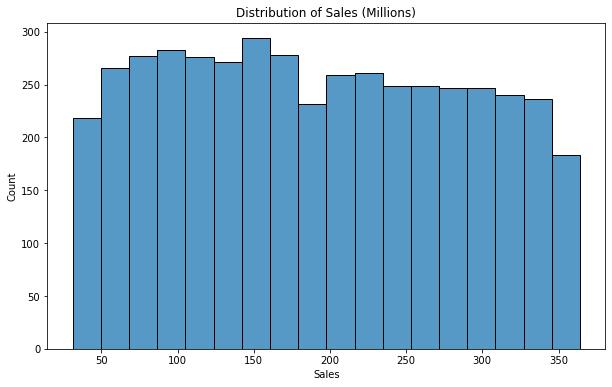

In [10]:
# Create a histogram of the Sales.

### YOUR CODE HERE ### 
plt.figure(figsize=(10,6))
sns.histplot(data=data, x="Sales")

# Add a title
plt.title("Distribution of Sales (Millions)")
plt.show()

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Use the function in the `seaborn` library that allows you to create a histogram.

</details>


<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Call the `histplot()` function from the `seaborn` library and pass in the `Sales` column as the argument.

</details>


<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

To get a specific column from a DataFrame, use a pair of single square brackets and place the name of the column, as a string, in the brackets. Be sure that the spelling, including case, matches the data exactly.

</details>


**Question:** What do you observe about the distribution of `Sales` from the preceding histogram?

[Write your response here. Double-click (or enter) to edit.]Sales are somewhat evenly distributed across the range

## Step 3: Model building

Create a pairplot to visualize the relationships between pairs of variables in the data. You will use this to visually determine which variable has the strongest linear relationship with `Sales`. This will help you select the X variable for the simple linear regression.

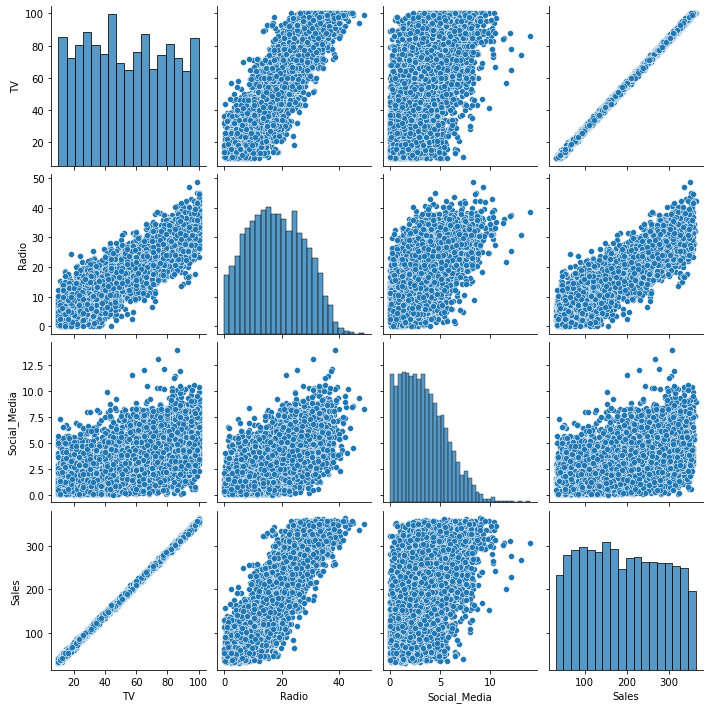

In [11]:
# Create a pairplot of the data.

### YOUR CODE HERE ### 
sns.pairplot(data)

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the video where creating a pairplot is demonstrated](https://www.coursera.org/learn/regression-analysis-simplify-complex-data-relationships/lecture/dnjWm/explore-linear-regression-with-python).

</details>


<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use the function in the `seaborn` library that allows you to create a pairplot that shows the relationships between variables in the data.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Use the [`pairplot()`](https://seaborn.pydata.org/generated/seaborn.pairplot.html) function from the `seaborn` library and pass in the entire DataFrame.

</details>


**Question:** Which variable did you select for X? Why?

[Write your response here. Double-click (or enter) to edit.] TV vs Sales is highly correlated. 

### Build and fit the model

Replace the comment with the correct code. Use the variable you chose for `X` for building the model.

In [12]:
# Define the OLS formula.

### YOUR CODE HERE ### 
radio_formula = "Sales ~ TV"
df_sales = data[["TV","Sales"]]
# Create an OLS model.

### YOUR CODE HERE ### 
OLS = ols(formula=radio_formula, data=df_sales)
# Fit the model.

### YOUR CODE HERE ### 
model = OLS.fit()

# Save the results summary.

### YOUR CODE HERE ### 
summary = model.summary()
# Display the model results.

### YOUR CODE HERE ### 
print(summary)

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 4.527e+06
Date:                Wed, 16 Oct 2024   Prob (F-statistic):               0.00
Time:                        07:45:06   Log-Likelihood:                -11393.
No. Observations:                4556   AIC:                         2.279e+04
Df Residuals:                    4554   BIC:                         2.280e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1263      0.101     -1.257      0.2

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the video where an OLS model is defined and fit](https://www.coursera.org/learn/regression-analysis-simplify-complex-data-relationships/lecture/Gi8Dl/ordinary-least-squares-estimation).

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use the [`ols()`](https://www.statsmodels.org/devel/generated/statsmodels.formula.api.ols.html) function imported earlier— which creates a model from a formula and DataFrame—to create an OLS model.

</details>


<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Replace the `X` in `'Sales ~ X'` with the independent feature you determined has the strongest linear relationship with `Sales`. Be sure the string name for `X` exactly matches the column's name in `data`.

</details>

<details>
<summary><h4><strong>Hint 4</strong></h4></summary>

Obtain the model results summary using `model.summary()` and save it. Be sure to fit the model before saving the results summary. 

</details>

### Check model assumptions

To justify using simple linear regression, check that the four linear regression assumptions are not violated. These assumptions are:

* Linearity
* Independent Observations
* Normality
* Homoscedasticity

### Model assumption: Linearity

The linearity assumption requires a linear relationship between the independent and dependent variables. Check this assumption by creating a scatterplot comparing the independent variable with the dependent variable. 

Create a scatterplot comparing the X variable you selected with the dependent variable.

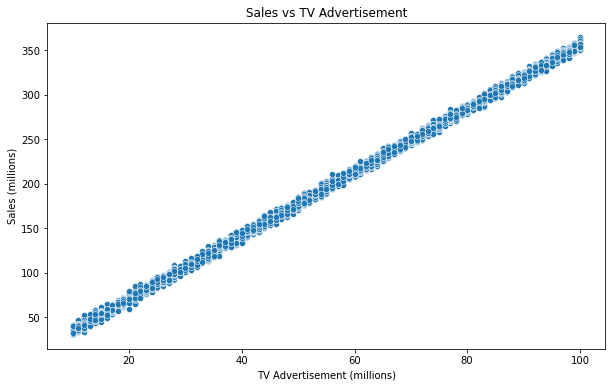

In [16]:
# Create a scatterplot comparing X and Sales (Y).

### YOUR CODE HERE ### 
plt.figure(figsize=(10,6))
sns.scatterplot(data = df_sales, x = "TV", y = "Sales")
plt.xlabel("TV Advertisement (millions)")
plt.ylabel("Sales (millions)")
plt.title("Sales vs TV Advertisement")
plt.show()

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Use the function in the `seaborn` library that allows you to create a scatterplot to display the values for two variables.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use the [`scatterplot()`](https://seaborn.pydata.org/generated/seaborn.scatterplot.html) function in `seaborn`.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Pass the X and Y variables you chose for your simple linear regression as the arguments for `x` and `y`, respectively, in the `scatterplot()` function.

</details>

**QUESTION:** Is the linearity assumption met?

[Write your response here. Double-click (or enter) to edit.] yes the points are scattered clearly around a central linear line. 

### Model assumption: Independence

The **independent observation assumption** states that each observation in the dataset is independent. As each marketing promotion (i.e., row) is independent from one another, the independence assumption is not violated.

### Model assumption: Normality

The normality assumption states that the errors are normally distributed.

Create two plots to check this assumption:

* **Plot 1**: Histogram of the residuals
* **Plot 2**: Q-Q plot of the residuals

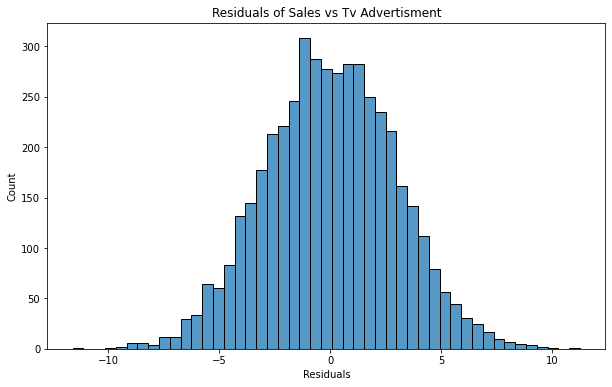

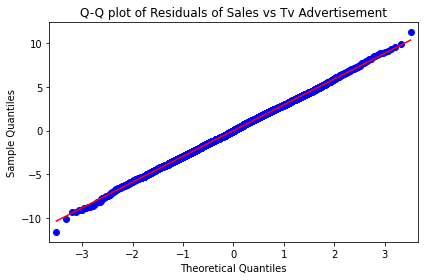

In [24]:
# Calculate the residuals.

### YOUR CODE HERE ### 
residuals = model.resid
# Create a 1x2 plot figures.

# Create a histogram with the residuals. 

### YOUR CODE HERE ### 
plt.figure(figsize = (10,6))
sns.histplot(data = residuals)
plt.xlabel("Residuals")
plt.title("Residuals of Sales vs Tv Advertisment")
# Set the x label of the residual plot.

# Set the title of the residual plot.

# Create a Q-Q plot of the residuals.

### YOUR CODE HERE ###
# plt.figure(figsize=(10,6))
sm.qqplot(residuals, line = 's')
plt.title("Q-Q plot of Residuals of Sales vs Tv Advertisement")

# Set the title of the Q-Q plot.

# Use matplotlib's tight_layout() function to add space between plots for a cleaner appearance.

# Show the plot.
plt.tight_layout()
plt.show()

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Access the residuals from the fit model object.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use `model.resid` to get the residuals from the fit model.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

For the histogram, pass the residuals as the first argument in the `seaborn` `histplot()` function.
    
For the Q-Q plot, pass the residuals as the first argument in the `statsmodels` [`qqplot()`](https://www.statsmodels.org/stable/generated/statsmodels.graphics.gofplots.qqplot.html) function.

</details>

**Question:** Is the normality assumption met?

[Write your response here. Double-click (or enter) to edit.] yes, assumption of normality is met, the residuals are normally distributed and the most of the points on the Q-Q plt closely follow the central line. 

### Model assumption: Homoscedasticity

The **homoscedasticity (constant variance) assumption** is that the residuals have a constant variance for all values of `X`.

Check that this assumption is not violated by creating a scatterplot with the fitted values and residuals. Add a line at $y = 0$ to visualize the variance of residuals above and below $y = 0$.

Text(0, 0.5, 'Residuals')

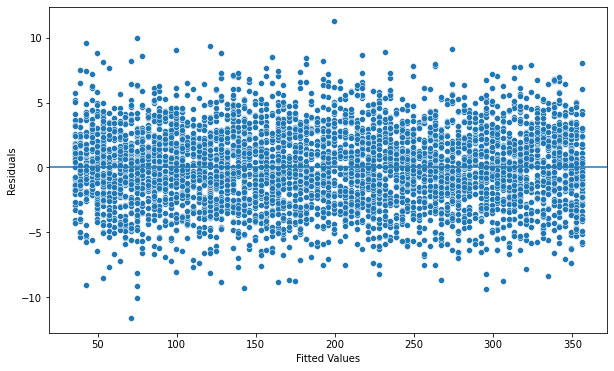

In [26]:
# Create a scatterplot with the fitted values from the model and the residuals.

### YOUR CODE HERE ### 
X = df_sales["TV"]
fitted_values = model.predict(X)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=fitted_values, y=residuals)
plt.axhline(0)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")


# Set the x-axis label.

# Set the y-axis label.

# Set the title.

# Add a line at y = 0 to visualize the variance of residuals above and below 0.

### YOUR CODE HERE ### 

# Show the plot.

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Access the fitted values from the `model` object fit earlier.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use `model.fittedvalues` to get the fitted values from the fit model.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Call the `scatterplot()` function from the `seaborn` library and pass in the fitted values and residuals.
    
Add a line to the figure using the `axline()` function.

</details>

**QUESTION:** Is the homoscedasticity assumption met?

[Write your response here. Double-click (or enter) to edit.] the homoscedasticity assumption is met, all points seem to be randomly and evenly scattered across the plot

## Step 4: Results and evaluation

### Display the OLS regression results

If the linearity assumptions are met, you can interpret the model results accurately.

Display the OLS regression results from the fitted model object, which includes information about the dataset, model fit, and coefficients.

In [27]:
# Display the model_results defined previously.

### YOUR CODE HERE ###
print(summary)

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 4.527e+06
Date:                Wed, 16 Oct 2024   Prob (F-statistic):               0.00
Time:                        07:45:06   Log-Likelihood:                -11393.
No. Observations:                4556   AIC:                         2.279e+04
Df Residuals:                    4554   BIC:                         2.280e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1263      0.101     -1.257      0.2

**Question:** The R-squared on the preceding output measures the proportion of variation in the dependent variable (Y) explained by the independent variable (X). What is your intepretation of the model's R-squared?


[Write your response here. Double-click (or enter) to edit.] The R squared value of 0.999 shows very strong corelation of TV and sales

### Interpret the model results

With the model fit evaluated, assess the coefficient estimates and the uncertainty of these estimates.

**Question:** Based on the preceding model results, what do you observe about the coefficients?

[Write your response here. Double-click (or enter) to edit.] for every 1 million invested in tv advertisements there is a 3.5614 million increase in sales. 

**Question:** How would you write the relationship between X and `Sales` in the form of a linear equation?

[Write your response here. Double-click (or enter) to edit.] Sales = 3.5614X - 0.1263

**Question:** Why is it important to interpret the beta coefficients?

[Write your response here. Double-click (or enter) to edit.] To interpret these coefficients we understand the actual quantified relationship between the variables

### Measure the uncertainty of the coefficient estimates

Model coefficients are estimated. This means there is an amount of uncertainty in the estimate. A p-value and $95\%$ confidence interval are provided with each coefficient to quantify the uncertainty for that coefficient estimate.

Display the model results again.

In [28]:
# Display the model_results defined previously.

### YOUR CODE HERE ###
print(summary)

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 4.527e+06
Date:                Wed, 16 Oct 2024   Prob (F-statistic):               0.00
Time:                        07:45:06   Log-Likelihood:                -11393.
No. Observations:                4556   AIC:                         2.279e+04
Df Residuals:                    4554   BIC:                         2.280e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1263      0.101     -1.257      0.2

**Question:** Based on this model, what is your interpretation of the p-value and confidence interval for the coefficient estimate of X?

[Write your response here. Double-click (or enter) to edit.] p-value: 0.000 confidence interval: 3.558 and 3.565
based on this information, we should reject the null hypothesis, this low p value indicates a statistically significant correlation. 

When TV is used as the independent variable, it has a p-value of  0.000
  and a  95%
  confidence interval of  [3.558,3.565]
 . This means there is a  95%
  chance the interval  [3.558,3.565]
  contains the true parameter value of the slope. These results indicate little uncertainty in the estimation of the slope of X. Therefore, the business can be confident in the impact TV has on Sales.

**Question:** Based on this model, what are you interested in exploring?

[Write your response here. Double-click (or enter) to edit.] We should explore the greater impact of tv advertisement and how to tune the sales increase with improved advertisement. 

Potential areas to explore include:

Providing the business with the estimated sales given different TV promotional budgets
Using both TV and Radio as independent variables
Adding plots to help convey the results, such as using the seaborn regplot() to plot the data with a best fit regression line

**Question:** What recommendations would you make to the leadership at your organization?

[Write your response here. Double-click (or enter) to edit.]
There is a strong correlation of tv advertisement and sales increases. with a p value of 0.000 and a very small confidence interval. 

Of the three available promotion types (TV, radio, and social media), TV has the strongest positive linear relationship with sales. According to the model, an increase of one million dollars for the TV promotional budget will result in an estimated 3.5614 million dollars more in sales. This is a very confident estimate, as the p-value for this coefficient estimate is small. Thus, the business should prioritize increasing the TV promotional budget over the radio and social media promotional budgets to increase sales.

## Considerations

**What are some key takeaways that you learned from this lab?**

[Write your response here. Double-click (or enter) to edit.]
Exploratory data analysis can be used to find a suitable X variable for a simple linear regression model.
It's important to check that simple linear regression assumptions are met before interpreting model results.
R-squared is a useful measure of prediction error.
It's important to provide measures of uncertainty (e.g., p-values, confidence intervals) with any coefficient estimates.

**What findings would you share with others?**

[Write your response here. Double-click (or enter) to edit.]
Exploratory data analysis can be used to find a suitable X variable for a simple linear regression model.
It's important to check that simple linear regression assumptions are met before interpreting model results.
R-squared is a useful measure of prediction error.
It's important to provide measures of uncertainty (e.g., p-values, confidence intervals) with any coefficient estimates.

**How would you frame your findings to stakeholders?**

[Write your response here. Double-click (or enter) to edit.]
Among TV, social media, and radio, TV had the strongest positive linear relationship with sales.
The linear regression model estimates that 99.9% of the variation in sales is explained by the TV promotional budget. In other words, nearly all of the variation in sales can be explained by the TV promotional budget alone, making TV an excellent predictor of sales.
According to the model, when TV is used as the independent variable X, an increase of one million dollars for the TV promotional budget would result in an estimated 3.5614 million more dollars in sales.
The interval (3.558 million, 3.565 million) has a 95% probability of containing the true estimate of the increase in sales for a one million dollar increase in the TV promotional budget. Therefore, the estimate provided in the previous bullet is very confident.

#### **References**

Saragih, H.S. (2020). [*Dummy Marketing and Sales Data*](https://www.kaggle.com/datasets/harrimansaragih/dummy-advertising-and-sales-data).

Dale, D.,Droettboom, M., Firing, E., Hunter, J. (n.d.). [*Matplotlib.Pyplot.Axline — Matplotlib 3.5.0 Documentation*](https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.axline.html). 

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.